**Problem 1**

Part A

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def forward_euler_SIS(gamma, beta, delta_t, I_0, S_0):
    S = [S_0]
    I = [I_0]
    
    for t in range(1,25):
        s_t = S[t-1] + delta_t*((-beta*S[t-1]*I[t-1])+(gamma*I[t-1]))
        S.append(s_t)
        
        i_t = I[t-1] + delta_t*((beta*S[t-1]*I[t-1])-(gamma*I[t-1]))
        I.append(i_t)
    
    return S, I

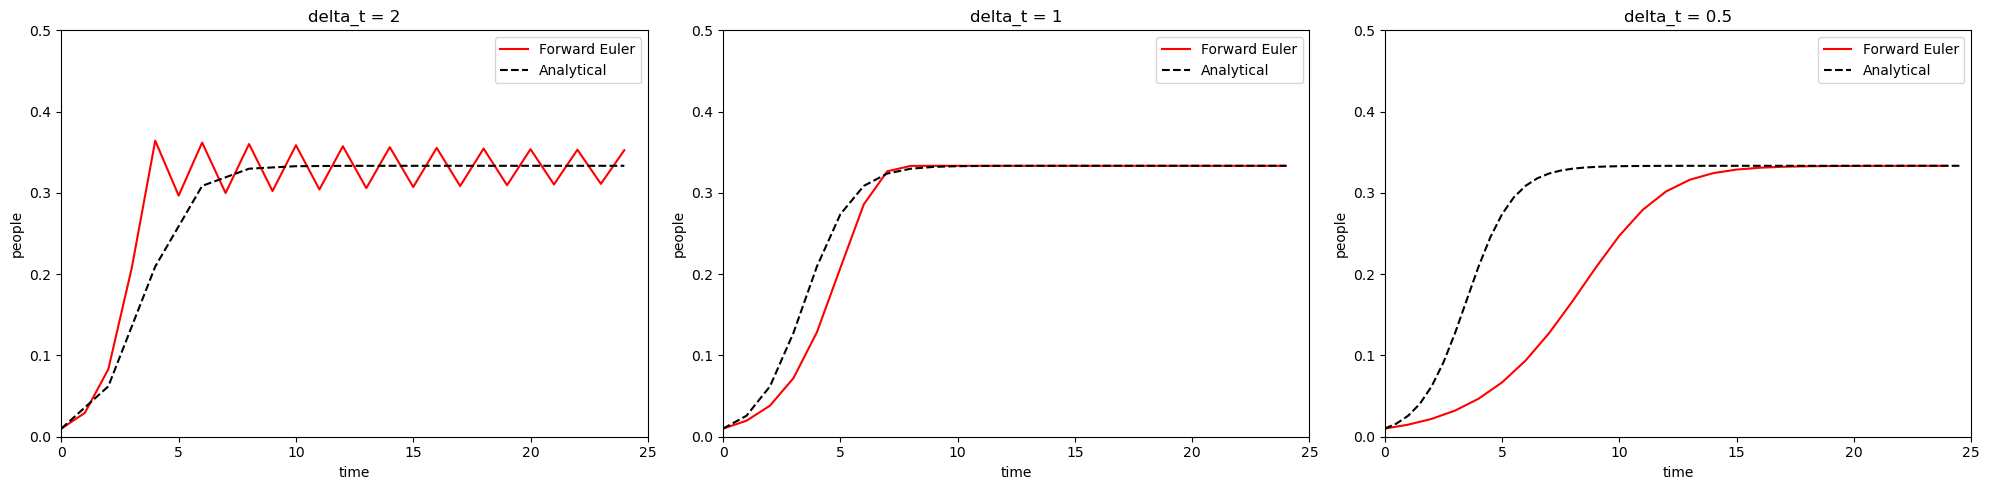

In [8]:
gamma = 2
beta = 3
S_0 = 0.99
I_0 = 0.01
R_0 = beta/gamma 
delta_ts = [2,1,0.5]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for i, delta_t in enumerate(delta_ts):
    S, I = forward_euler_SIS(gamma, beta, delta_t, I_0, S_0)
    t = np.arange(0,25, delta_t)
    analytical = (1-(1/R_0))/(1+((1-(1/R_0)-I_0)/(I_0))*np.exp(-(beta-gamma)*t))
    axes[i].plot(I, label='Forward Euler', color='red')
    axes[i].plot(t, analytical, label='Analytical', color='black', linestyle='dashed')
    axes[i].set_xlabel("time")
    axes[i].set_ylabel("people")
    axes[i].set_title(f'delta_t = {delta_t}')
    axes[i].set_xlim([0, 25])
    axes[i].set_ylim([0, 0.5])
    axes[i].legend()

plt.tight_layout()
plt.savefig("Figures/SIS Figures")
plt.show()

Part C

In [17]:
def max_absolute_error(beta, gamma, S_0, I_0, delta_t):
    S, I = forward_euler_SIS(gamma, beta, delta_t, I_0, S_0)
    T = len(I)
    t = np.linspace(0, T*delta_t, T)
    analytical = (1-(1/R_0))/(1+((1-(1/R_0)-I_0)/(I_0))*np.exp(-(beta-gamma)*t))
    return np.max(np.abs(np.array(I) - analytical))

# Example
delta_t = 0.5
max_error = max_absolute_error(beta, gamma, S_0, I_0, delta_t)
print(f"Expected maximum absolute error for dt={delta_t}: {max_error}")


Expected maximum absolute error for dt=0.5: 0.05551294452284403


Part D

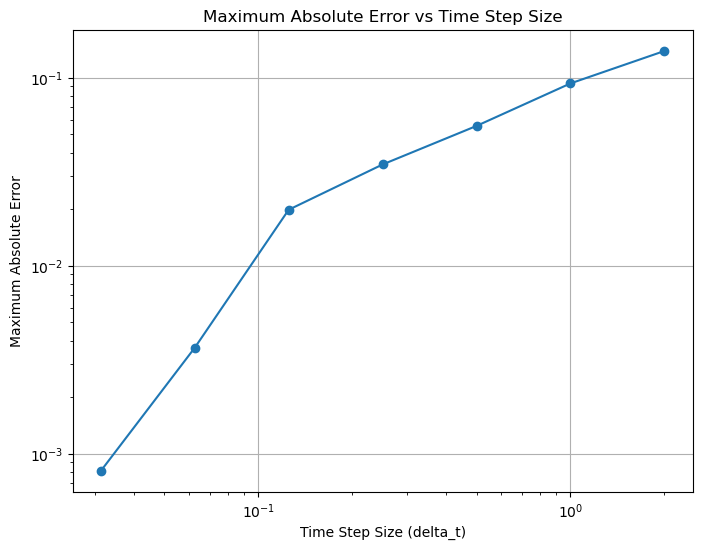

In [19]:
delta_ts = [2,1,1/2,1/4,1/8,1/16,1/32]

max_errors = [max_absolute_error(beta, gamma, S_0, I_0, delta_t) for delta_t in delta_ts]

plt.figure(figsize=(8, 6))
plt.loglog(delta_ts, max_errors, marker='o')
plt.xlabel('Time Step Size (delta_t)')
plt.ylabel('Maximum Absolute Error')
plt.title('Maximum Absolute Error vs Time Step Size')
plt.grid(True)
plt.savefig('Figures/MaxAbsoluteError_byTimeStep')
plt.show()